In [318]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the Excel file
file_path = "log_evaluations.xlsx"  # Replace with your actual file path
df = pd.read_excel("log_evaluations.xlsx")

In [319]:
# all values in Model column to lowercase
df['Model'] = df['Model'].str.lower()
# Define the renaming function
def rename_model(model_name):
    model_name = re.sub(r'^llama-3-8b', 'llama3:8b', model_name)
    model_name = re.sub(r'^llama3:8b-bnb', 'llama3:8b-text-bnb', model_name)
    model_name = re.sub(r'^phi-3', 'phi3:14b', model_name)
    return model_name

# Apply the renaming function to the 'Model' column
df['Model'] = df['Model'].apply(rename_model)

df.head(20)

,Model,Evaluator Model,Random Seed,Number of Samples,Total Time,Test Match Time,Test Match Scores,Test Match Results,Test Correctness Time,Test Correctness Scores,...,Test Match Results - BootstrapFewShot,Test Correctness Time - BootstrapFewShot,Test Correctness Scores - BootstrapFewShot,Test Correctness Results - BootstrapFewShot,Test Executable Time - BootstrapFewShot,Test Executable Scores - BootstrapFewShot,Test Executable Results - BootstrapFewShot,Test Combined Scores - BootstrapFewShot,Max Bootstrapped Demos,Number of Candidate Programs
0,mistral:7b-instruct-v0.3-q5_k_m,llama3:70b,1,200,326.36,16.19,0.5000,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,16.19,1.0000,...,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,16.58,1.0000,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,16.58,1.0000,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,0.428571,2,2
1,mistral:7b-instruct-v0.3-q5_k_m,llama3:70b,1,200,297.67,16.52,0.5000,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,16.52,1.0000,...,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,16.55,1.0000,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,16.55,0.0000,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,0.285714,2,2
2,mistral:7b-instruct-v0.3-q5_k_m,llama3:70b,1,200,1876.88,279.26,0.3875,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,279.26,0.7875,...,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,206.43,0.8125,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,206.43,0.6250,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,0.000000,2,2
3,llama3:8b-text-bnb-4bit-synthetic_text_to_sql-...,llama3:70b,1,200,2911.15,396.87,0.4625,logs\llama_3_8b_bnb_4bit_synthetic_text_to_sql...,396.87,0.7125,...,logs\llama_3_8b_bnb_4bit_synthetic_text_to_sql...,345.33,0.6125,logs\llama_3_8b_bnb_4bit_synthetic_text_to_sql...,345.33,0.6125,logs\llama_3_8b_bnb_4bit_synthetic_text_to_sql...,0.000000,2,2
4,llama3:8b-instruct-bnb-4bit-synthetic_text_to_...,llama3:70b,1,200,1233.15,155.88,0.4500,logs\llama_3_8b_Instruct_bnb_4bit_synthetic_te...,155.88,0.8125,...,logs\llama_3_8b_Instruct_bnb_4bit_synthetic_te...,178.38,0.6875,logs\llama_3_8b_Instruct_bnb_4bit_synthetic_te...,178.38,0.6875,logs\llama_3_8b_Instruct_bnb_4bit_synthetic_te...,0.000000,2,2
5,phi3:14b-medium-4k-instruct-synthetic_text_to_...,llama3:70b,1,200,1408.79,167.47,0.4500,logs\Phi_3_medium_4k_instruct_synthetic_text_t...,167.47,0.9000,...,logs\Phi_3_medium_4k_instruct_synthetic_text_t...,212.05,0.9000,logs\Phi_3_medium_4k_instruct_synthetic_text_t...,212.05,0.7625,logs\Phi_3_medium_4k_instruct_synthetic_text_t...,0.000000,2,2
6,phi3:14b-medium-4k-instruct-q5_k_m,llama3:70b,1,200,2333.97,300.70,0.3625,logs\phi3_14b_medium_4k_instruct_q5_K_M_llama3...,300.70,0.8500,...,logs\phi3_14b_medium_4k_instruct_q5_K_M_llama3...,605.37,0.7125,logs\phi3_14b_medium_4k_instruct_q5_K_M_llama3...,605.37,0.7500,logs\phi3_14b_medium_4k_instruct_q5_K_M_llama3...,0.000000,2,2
7,llama3:8b-text-q5_k_m,llama3:70b,1,200,3652.35,694.26,0.2500,logs\llama3_8b_text_q5_K_M_llama3_70b_1_200_te...,694.26,0.5625,...,logs\llama3_8b_text_q5_K_M_llama3_70b_1_200_te...,592.02,0.3875,logs\llama3_8b_text_q5_K_M_llama3_70b_1_200_te...,592.02,0.4625,logs\llama3_8b_text_q5_K_M_llama3_70b_1_200_te...,0.000000,2,2
8,llama3:8b-instruct-q5_k_m,llama3:70b,1,200,3132.77,494.68,0.4250,logs\llama3_8b_instruct_q5_K_M_llama3_70b_1_20...,494.68,0.5875,...,logs\llama3_8b_instruct_q5_K_M_llama3_70b_1_20...,508.27,0.5125,logs\llama3_8b_instruct_q5_K_M_llama3_70b_1_20...,508.27,0.5375,logs\llama3_8b_instruct_q5_K_M_llama3_70b_1_20...,0.000000,2,2
9,command-r,llama3:70b,1,200,2793.01,162.82,0.3625,logs\command_r_llama3_70b_1_200_test_match_1.txt,162.82,0.8250,...,logs\command_r_llama3_70b_1_200_test_bootstrap...,261.55,0.8500,logs\command_r_llama3_70b_1_200_test_bootstrap...,261.55,0.6250,logs\command_r_llama3_70b_1_200_test_bootstrap...,0.000000,2,2


In [320]:
# select only model columns starting with phi* and llama*
# df = df[df['Model'].str.startswith('phi') | df['Model'].str.startswith('llama')]

In [321]:
# Calculate combined scores
# Calculate combined scores and round to two decimal places
df['Test Combined Scores'] = df[['Test Match Scores', 'Test Correctness Scores', 'Test Executable Scores']].mean(axis=1).round(4)
df['Test Combined Scores - LabeledFewShot'] = df[['Test Match Scores - LabeledFewShot', 'Test Correctness Scores - LabeledFewShot', 'Test Executable Scores - LabeledFewShot']].mean(axis=1).round(4)
df['Test Combined Scores - BootstrapFewShot'] = df[['Test Match Scores - BootstrapFewShot', 'Test Correctness Scores - BootstrapFewShot', 'Test Executable Scores - BootstrapFewShot']].mean(axis=1).round(4)



In [322]:
df.head(3)

,Model,Evaluator Model,Random Seed,Number of Samples,Total Time,Test Match Time,Test Match Scores,Test Match Results,Test Correctness Time,Test Correctness Scores,...,Test Match Results - BootstrapFewShot,Test Correctness Time - BootstrapFewShot,Test Correctness Scores - BootstrapFewShot,Test Correctness Results - BootstrapFewShot,Test Executable Time - BootstrapFewShot,Test Executable Scores - BootstrapFewShot,Test Executable Results - BootstrapFewShot,Test Combined Scores - BootstrapFewShot,Max Bootstrapped Demos,Number of Candidate Programs
0,mistral:7b-instruct-v0.3-q5_k_m,llama3:70b,1,200,326.36,16.19,0.5000,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,16.19,1.0000,...,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,16.58,1.0000,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,16.58,1.000,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,0.6667,2,2
1,mistral:7b-instruct-v0.3-q5_k_m,llama3:70b,1,200,297.67,16.52,0.5000,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,16.52,1.0000,...,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,16.55,1.0000,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,16.55,0.000,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,0.3333,2,2
2,mistral:7b-instruct-v0.3-q5_k_m,llama3:70b,1,200,1876.88,279.26,0.3875,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,279.26,0.7875,...,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,206.43,0.8125,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,206.43,0.625,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,0.5708,2,2


In [323]:
# remove first two rows
df = df.iloc[2:]

In [324]:
# Select the first 5 columns
first_five_columns = df.iloc[:, :5]

# Select columns with "Scores" and "Test" in their name after the first 5 columns
scores_test_columns = df.loc[:, [col for col in df.columns[5:] if 'Scores' in col and 'Test' in col and not 'Combined' in col]]


# Combine the first 5 columns with the selected "Scores" columns
result_df = pd.concat([first_five_columns, scores_test_columns], axis=1)

result_df.head(10)

,Model,Evaluator Model,Random Seed,Number of Samples,Total Time,Test Match Scores,Test Correctness Scores,Test Executable Scores,Test Match Scores - LabeledFewShot,Test Correctness Scores - LabeledFewShot,Test Executable Scores - LabeledFewShot,Test Match Scores - BootstrapFewShot,Test Correctness Scores - BootstrapFewShot,Test Executable Scores - BootstrapFewShot
2,mistral:7b-instruct-v0.3-q5_k_m,llama3:70b,1,200,1876.88,0.3875,0.7875,0.4750,0.3125,0.8000,0.5625,0.2750,0.8125,0.6250
3,llama3:8b-text-bnb-4bit-synthetic_text_to_sql-...,llama3:70b,1,200,2911.15,0.4625,0.7125,0.7500,0.4625,0.7500,0.6750,0.3875,0.6125,0.6125
4,llama3:8b-instruct-bnb-4bit-synthetic_text_to_...,llama3:70b,1,200,1233.15,0.4500,0.8125,0.7750,0.3750,0.7625,0.8250,0.2625,0.6875,0.6875
5,phi3:14b-medium-4k-instruct-synthetic_text_to_...,llama3:70b,1,200,1408.79,0.4500,0.9000,0.8125,0.3500,0.8125,0.7125,0.2750,0.9000,0.7625
6,phi3:14b-medium-4k-instruct-q5_k_m,llama3:70b,1,200,2333.97,0.3625,0.8500,0.4750,0.3625,0.8750,0.7625,0.5125,0.7125,0.7500
7,llama3:8b-text-q5_k_m,llama3:70b,1,200,3652.35,0.2500,0.5625,0.5125,0.2500,0.5625,0.6375,0.1625,0.3875,0.4625
8,llama3:8b-instruct-q5_k_m,llama3:70b,1,200,3132.77,0.4250,0.5875,0.4750,0.0250,0.0750,0.7375,0.5375,0.5125,0.5375
9,command-r,llama3:70b,1,200,2793.01,0.3625,0.8250,0.6750,0.4250,0.7500,0.6000,0.2625,0.8500,0.6250
10,codegemma:7b-code-q5_k_m,llama3:70b,1,200,3127.76,0.3500,0.6500,0.6500,0.4000,0.7000,0.7625,0.2875,0.5750,0.5500
11,aya:35b,llama3:70b,1,200,4125.74,0.2250,0.8125,0.3875,0.3125,0.7750,0.4500,0.2625,0.8750,0.7250


In [325]:
# filter models with les than 100 "Number of Samples"
df = df[df["Number of Samples"] > 100]

In [326]:
# sort the data by model name
df = df.sort_values(by='Model')

In [327]:
# Function to insert line breaks in model names and make all letters lowercase
def process_model_names(text, max_length=20):
    text = text.lower()
    return '\n'.join([text[i:i+max_length] for i in range(0, len(text), max_length)])

# Apply the transformations to the 'Model' column
df['Model'] = df['Model'].apply(process_model_names)

# Sort the DataFrame by the modified 'Model' column
df = df.sort_values(by='Model')

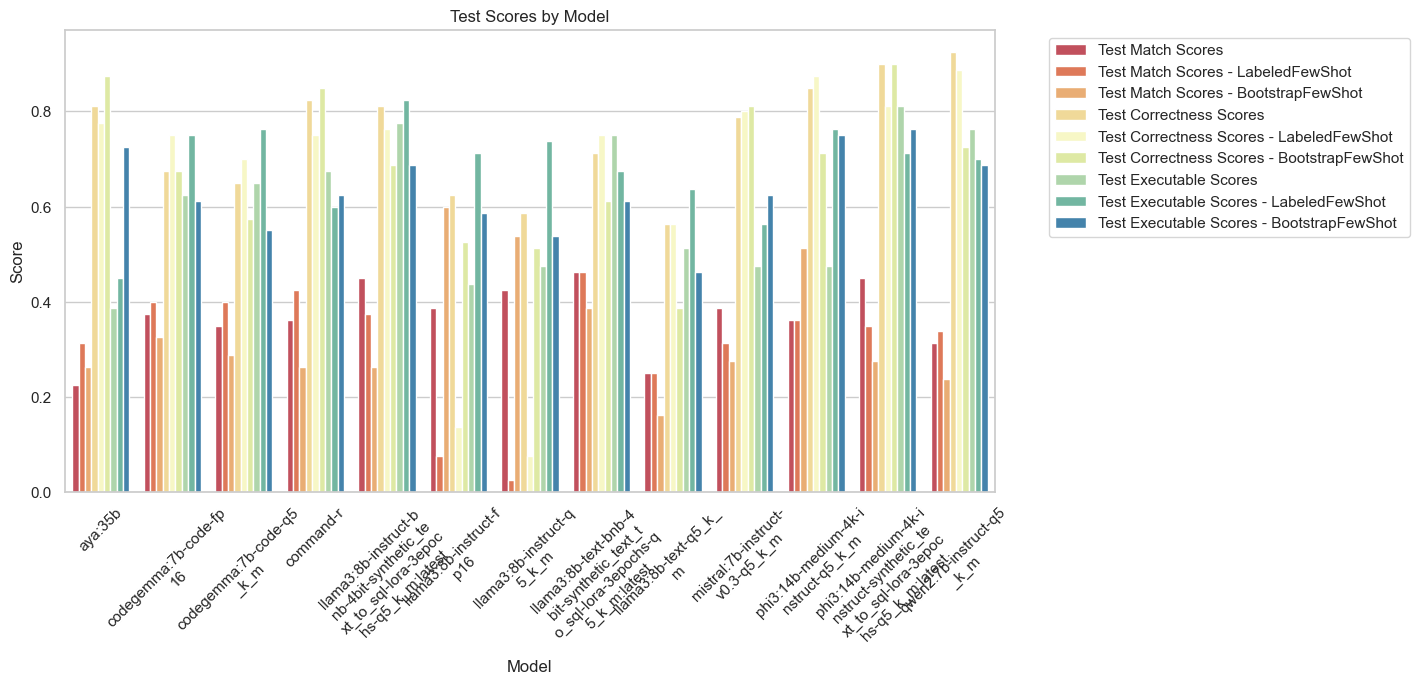

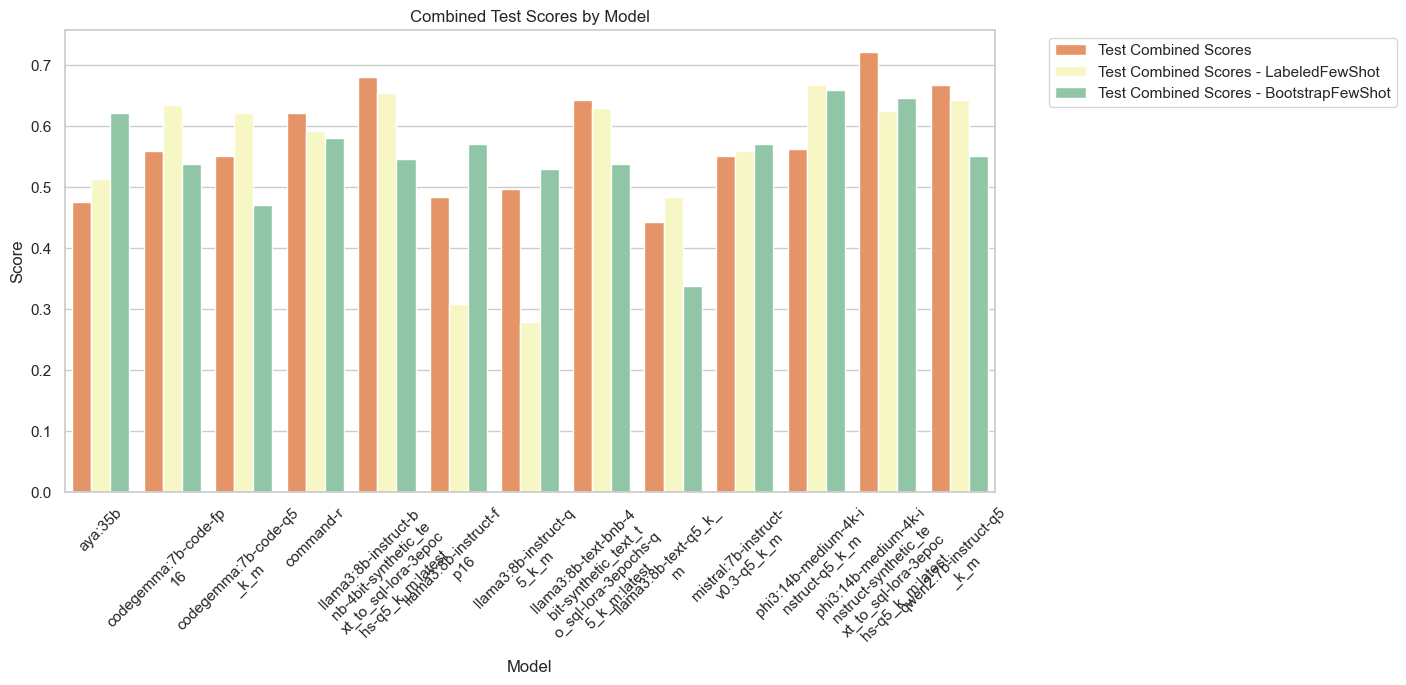

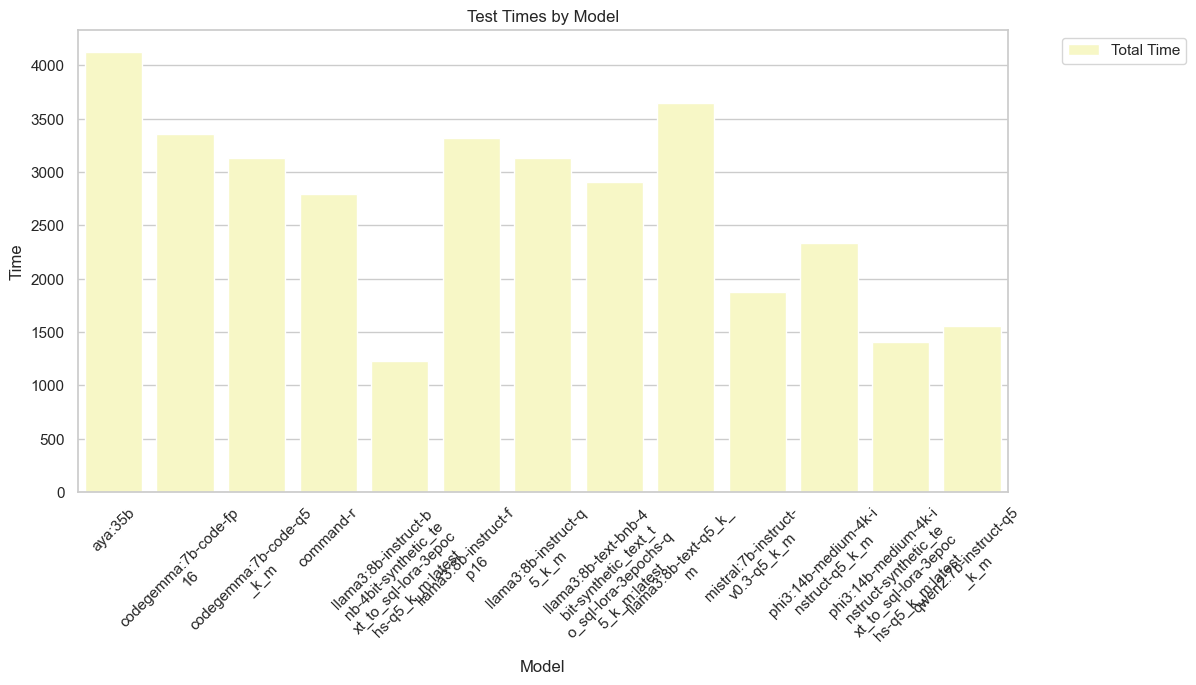

In [328]:
# Set seaborn style for the plots
sns.set(style='whitegrid')

# Function to create grouped bar plot for scores
def plot_grouped_scores(df, score_columns, title):
    melted_df = df.melt(id_vars=['Model'], value_vars=score_columns, var_name='Score Type', value_name='Score')
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Model', y='Score', hue='Score Type', data=melted_df, palette='Spectral')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Function to create grouped bar plot for times
def plot_grouped_times(df, time_columns, title):
    melted_df = df.melt(id_vars=['Model'], value_vars=time_columns, var_name='Time Type', value_name='Time')
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Model', y='Time', hue='Time Type', data=melted_df, palette='Spectral')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot grouped test scores
plot_grouped_scores(df, [
    "Test Match Scores", "Test Match Scores - LabeledFewShot", "Test Match Scores - BootstrapFewShot",
    "Test Correctness Scores", "Test Correctness Scores - LabeledFewShot", "Test Correctness Scores - BootstrapFewShot",
    "Test Executable Scores", "Test Executable Scores - LabeledFewShot", "Test Executable Scores - BootstrapFewShot"
], 'Test Scores by Model')

plot_grouped_scores(df, [
    "Test Combined Scores", "Test Combined Scores - LabeledFewShot", "Test Combined Scores - BootstrapFewShot"
], 'Combined Test Scores by Model')

# Plot grouped test times
plot_grouped_times(df, [
    "Total Time"
], 'Test Times by Model')


C:\Users\Felix\AppData\Local\Temp\ipykernel_20808\1657091205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Number of Samples', data=df, palette='coolwarm')


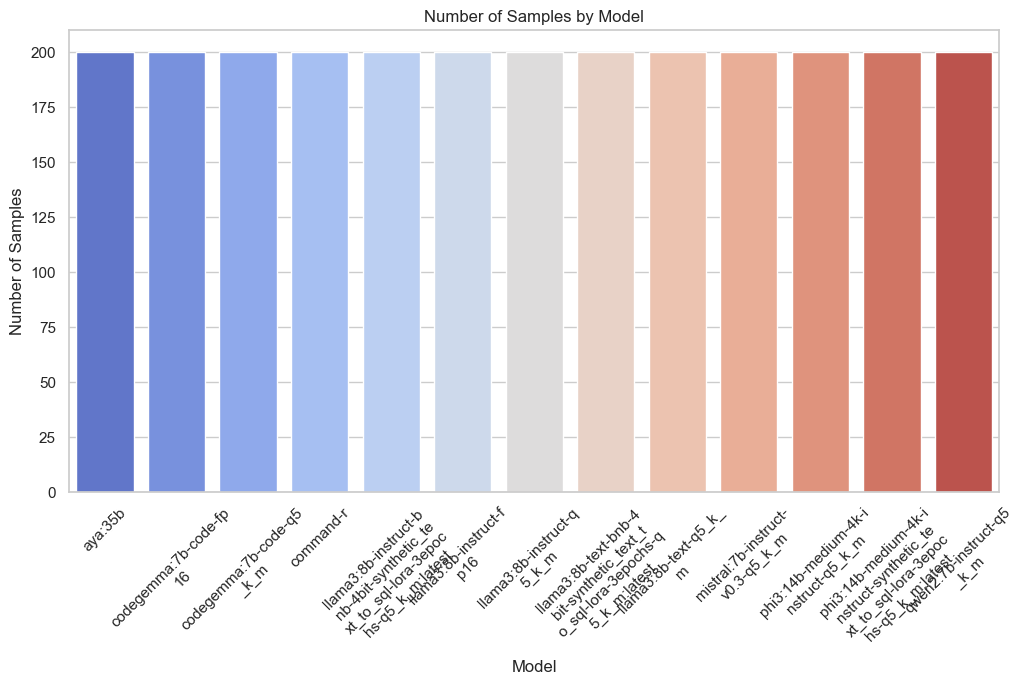

C:\Users\Felix\AppData\Local\Temp\ipykernel_20808\1657091205.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Random Seed', data=df, palette='tab10')


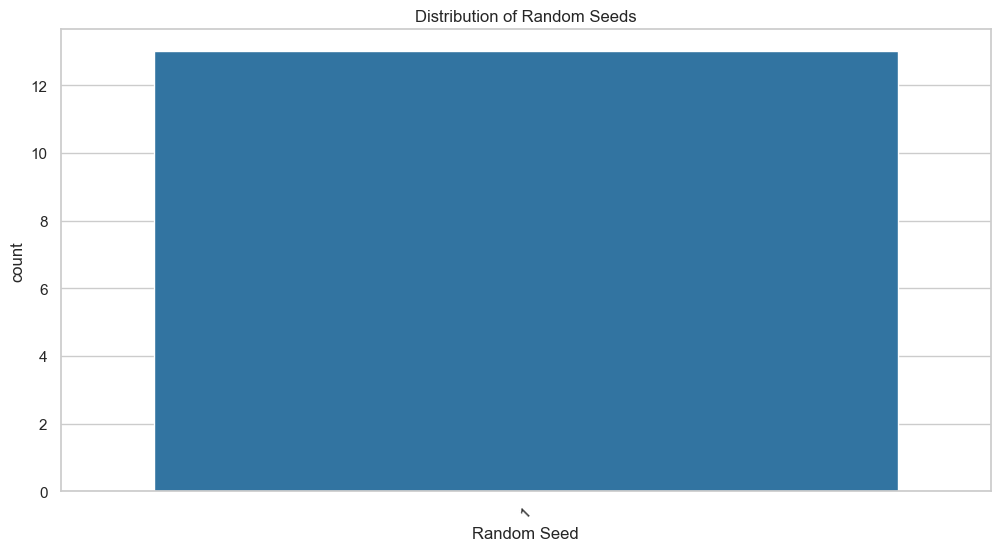

In [329]:
# Additional functions for further analysis

# Function to plot number of samples by model
def plot_samples(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Number of Samples', data=df, palette='coolwarm')
    plt.title('Number of Samples by Model')
    plt.xticks(rotation=45)
    plt.show()

# Function to plot random seed distribution
def plot_random_seed(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Random Seed', data=df, palette='tab10')
    plt.title('Distribution of Random Seeds')
    plt.xticks(rotation=45)
    plt.show()

# Plot number of samples and random seed distribution
plot_samples(df)
plot_random_seed(df)

# # Function to plot comparison of candidate programs in FewShot methods
# def plot_candidate_programs(df):
#     plt.figure(figsize=(12, 6))
#     sns.barplot(x='Model', y='Number of candidate programs - LabeledFewShot', data=df, palette='spring', label='LabeledFewShot')
#     sns.barplot(x='Model', y='Number of candidate programs - BootstrapFewShot', data=df, palette='summer', label='BootstrapFewShot')
#     plt.title('Number of Candidate Programs by Model')
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.show()

# # Plot candidate programs comparison
# plot_candidate_programs(df)

In [330]:
# # Ensure the correct column names are used
# test_score_columns = [
#     "Test Match Scores", 
#     "Test Match Scores - LabeledFewShot", 
#     "Test Match Scores - BootstrapFewShot"
# ]

# # Calculate the mean performance for each score type
# mean_test_scores = df[test_score_columns].mean(axis=0)

# # Normalize the scores by subtracting the mean score
# df['Normalized Test Scores'] = df['Test Match Scores'] - mean_test_scores['Test Match Scores']
# df['Normalized Test Scores - LabeledFewShot'] = df['Test Match Scores - LabeledFewShot'] - mean_test_scores['Test Match Scores - LabeledFewShot']
# df['Normalized Test Scores - BootstrapFewShot'] = df['Test Match Scores - BootstrapFewShot'] - mean_test_scores['Test Match Scores - BootstrapFewShot']

# # Function to create grouped bar plot for scores
# def plot_grouped_scores(df, score_columns, title):
#     melted_df = df.melt(id_vars=['Model'], value_vars=score_columns, var_name='Score Type', value_name='Score')
#     plt.figure(figsize=(12, 6))
#     ax = sns.barplot(x='Model', y='Score', hue='Score Type', data=melted_df, palette='Spectral')
#     plt.title(title)
#     plt.xticks(rotation=45)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.show()

# # Function to create grouped bar plot for times
# def plot_grouped_times(df, time_columns, title):
#     melted_df = df.melt(id_vars=['Model'], value_vars=time_columns, var_name='Time Type', value_name='Time')
#     plt.figure(figsize=(12, 6))
#     ax = sns.barplot(x='Model', y='Time', hue='Time Type', data=melted_df, palette='Spectral')
#     plt.title(title)
#     plt.xticks(rotation=45)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.show()

# # Plot grouped normalized test scores
# plot_grouped_scores(df, [
#     'Normalized Test Scores', 
#     'Normalized Test Scores - LabeledFewShot', 
#     'Normalized Test Scores - BootstrapFewShot'
# ], 'Normalized Test Scores by Model')


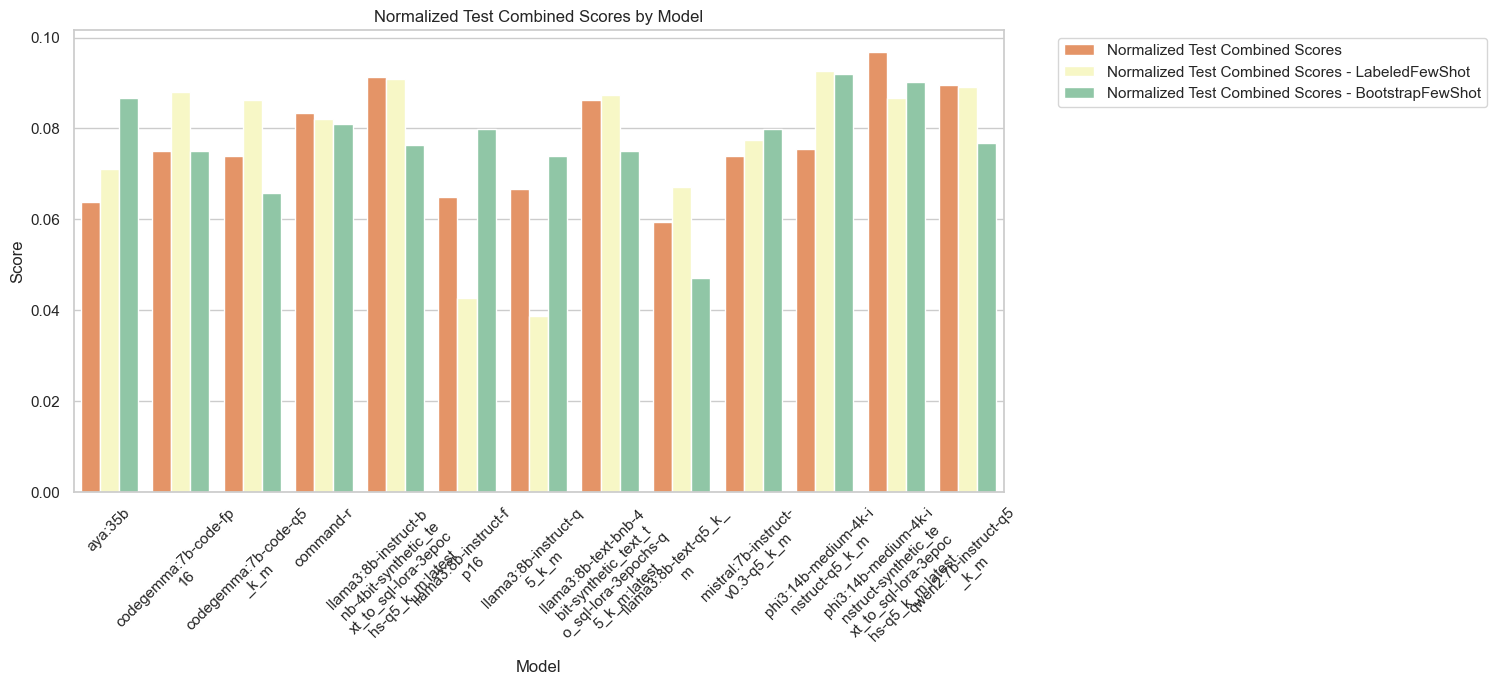

In [331]:
# Calculate the sum of each score type
sum_test_scores = df[['Test Combined Scores', 'Test Combined Scores - LabeledFewShot', 'Test Combined Scores - BootstrapFewShot']].sum(axis=0)

# Normalize the scores by dividing by the sum
df['Normalized Test Combined Scores'] = df['Test Combined Scores'] / sum_test_scores['Test Combined Scores']
df['Normalized Test Combined Scores - LabeledFewShot'] = df['Test Combined Scores - LabeledFewShot'] / sum_test_scores['Test Combined Scores - LabeledFewShot']
df['Normalized Test Combined Scores - BootstrapFewShot'] = df['Test Combined Scores - BootstrapFewShot'] / sum_test_scores['Test Combined Scores - BootstrapFewShot']

# Plot grouped normalized test scores
plot_grouped_scores(df, [
    'Normalized Test Combined Scores', 
    'Normalized Test Combined Scores - LabeledFewShot', 
    'Normalized Test Combined Scores - BootstrapFewShot'], 
    'Normalized Test Combined Scores by Model')

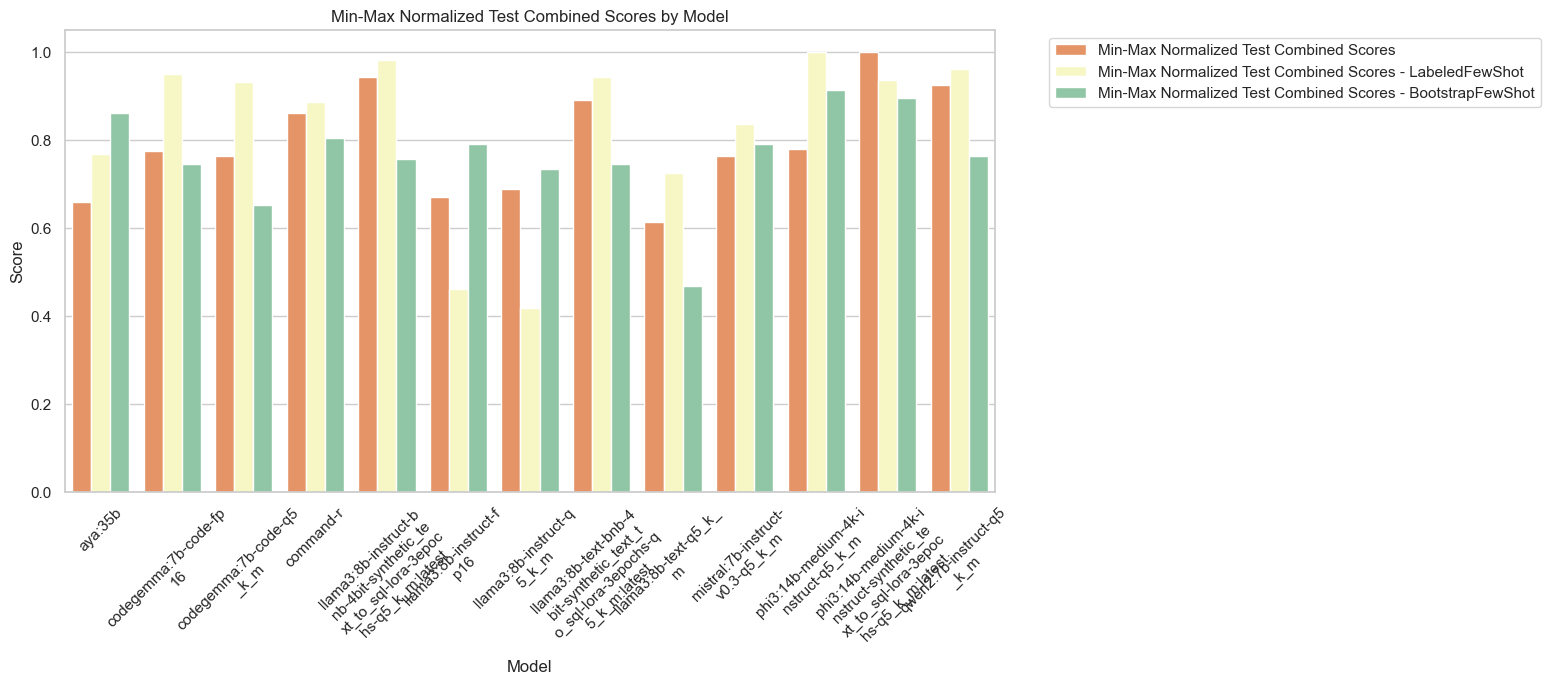

In [332]:
# Calculate the maximum value for each score type
max_test_scores = df[['Test Combined Scores', 'Test Combined Scores - LabeledFewShot', 'Test Combined Scores - BootstrapFewShot']].max(axis=0)

# Normalize the scores by dividing by the maximum value
df['Min-Max Normalized Test Combined Scores'] = df['Test Combined Scores'] / max_test_scores['Test Combined Scores']
df['Min-Max Normalized Test Combined Scores - LabeledFewShot'] = df['Test Combined Scores - LabeledFewShot'] / max_test_scores['Test Combined Scores - LabeledFewShot']
df['Min-Max Normalized Test Combined Scores - BootstrapFewShot'] = df['Test Combined Scores - BootstrapFewShot'] / max_test_scores['Test Combined Scores']

# Plot min-max normalized test scores
plot_grouped_scores(df, ['Min-Max Normalized Test Combined Scores', 'Min-Max Normalized Test Combined Scores - LabeledFewShot', 'Min-Max Normalized Test Combined Scores - BootstrapFewShot'], 'Min-Max Normalized Test Combined Scores by Model')


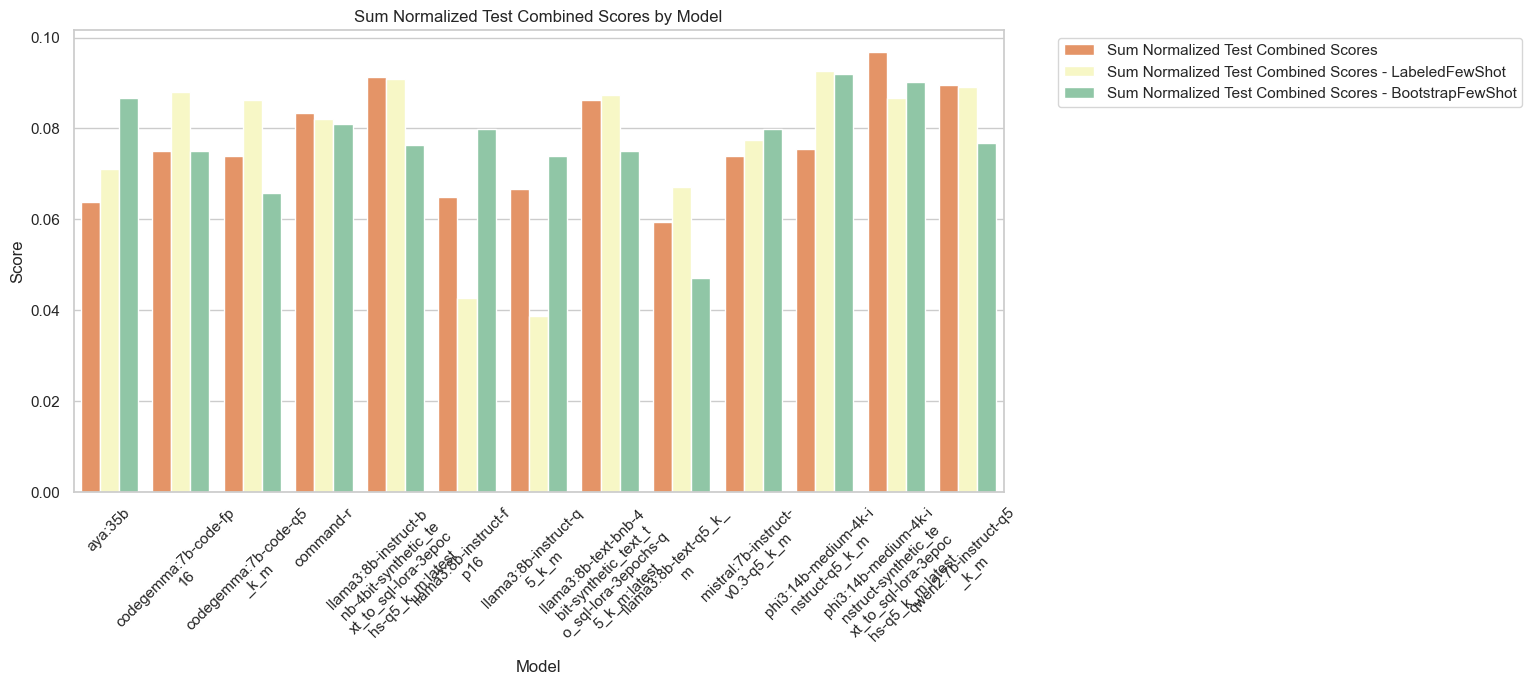

In [333]:
# Calculate the sum of each score type
sum_test_scores = df[['Test Combined Scores', 'Test Combined Scores - LabeledFewShot', 'Test Combined Scores - BootstrapFewShot']].sum(axis=0)

# Normalize the scores by dividing by the sum
df['Sum Normalized Test Combined Scores'] = df['Test Combined Scores'] / sum_test_scores['Test Combined Scores']
df['Sum Normalized Test Combined Scores - LabeledFewShot'] = df['Test Combined Scores - LabeledFewShot'] / sum_test_scores['Test Combined Scores - LabeledFewShot']
df['Sum Normalized Test Combined Scores - BootstrapFewShot'] = df['Test Combined Scores - BootstrapFewShot'] / sum_test_scores['Test Combined Scores - BootstrapFewShot']


# Plot sum normalized test scores
plot_grouped_scores(df, ['Sum Normalized Test Combined Scores', 'Sum Normalized Test Combined Scores - LabeledFewShot', 'Sum Normalized Test Combined Scores - BootstrapFewShot'], 'Sum Normalized Test Combined Scores by Model')


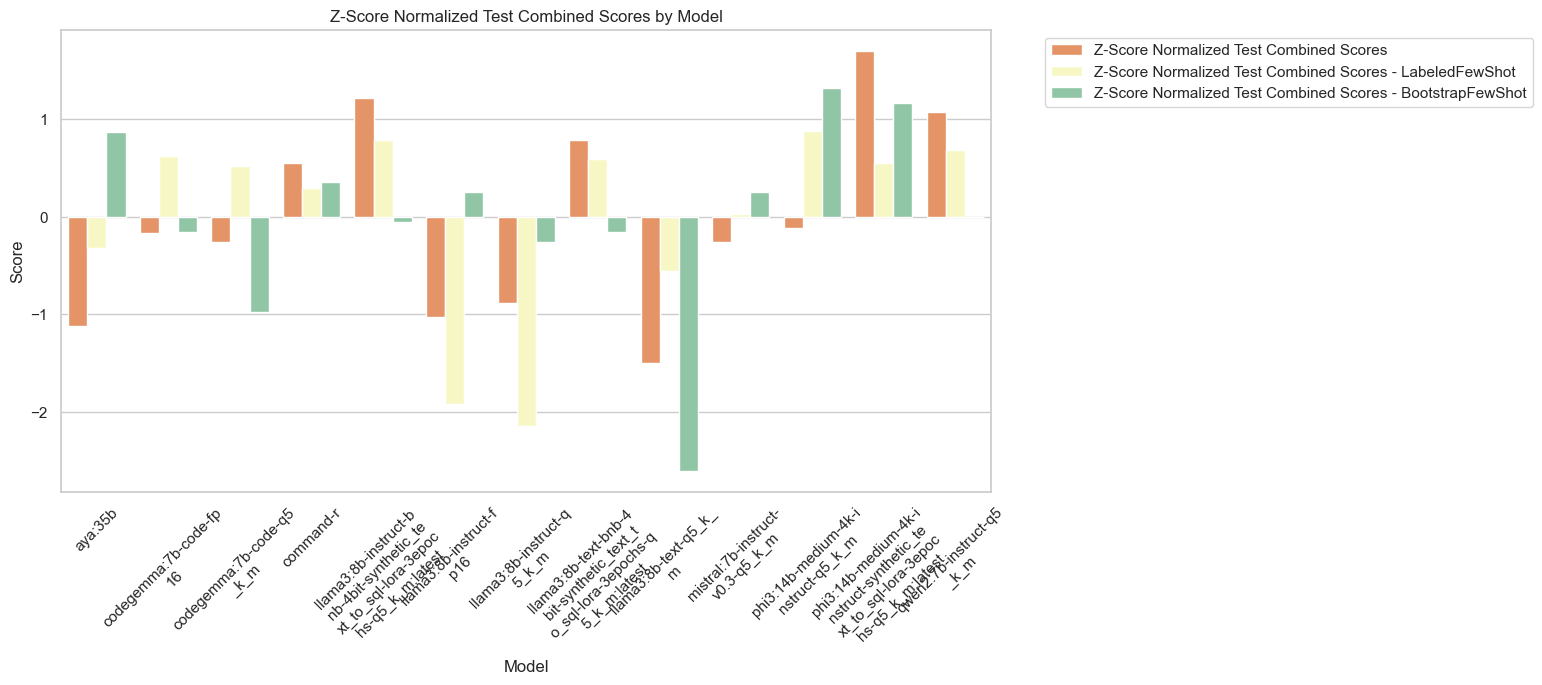

In [334]:
# Calculate the mean and standard deviation for each score type
mean_test_scores = df[['Test Combined Scores', 'Test Combined Scores - LabeledFewShot', 'Test Combined Scores - BootstrapFewShot']].mean(axis=0)
std_test_scores = df[['Test Combined Scores', 'Test Combined Scores - LabeledFewShot', 'Test Combined Scores - BootstrapFewShot']].std(axis=0)

# Normalize the scores using z-score
df['Z-Score Normalized Test Combined Scores'] = (df['Test Combined Scores'] - mean_test_scores['Test Combined Scores']) / std_test_scores['Test Combined Scores']
df['Z-Score Normalized Test Combined Scores - LabeledFewShot'] = (df['Test Combined Scores - LabeledFewShot'] - mean_test_scores['Test Combined Scores - LabeledFewShot']) / std_test_scores['Test Combined Scores - LabeledFewShot']
df['Z-Score Normalized Test Combined Scores - BootstrapFewShot'] = (df['Test Combined Scores - BootstrapFewShot'] - mean_test_scores['Test Combined Scores - BootstrapFewShot']) / std_test_scores['Test Combined Scores - BootstrapFewShot']

# Plot z-score normalized test scores
plot_grouped_scores(df, ['Z-Score Normalized Test Combined Scores', 'Z-Score Normalized Test Combined Scores - LabeledFewShot', 'Z-Score Normalized Test Combined Scores - BootstrapFewShot'], 'Z-Score Normalized Test Combined Scores by Model')


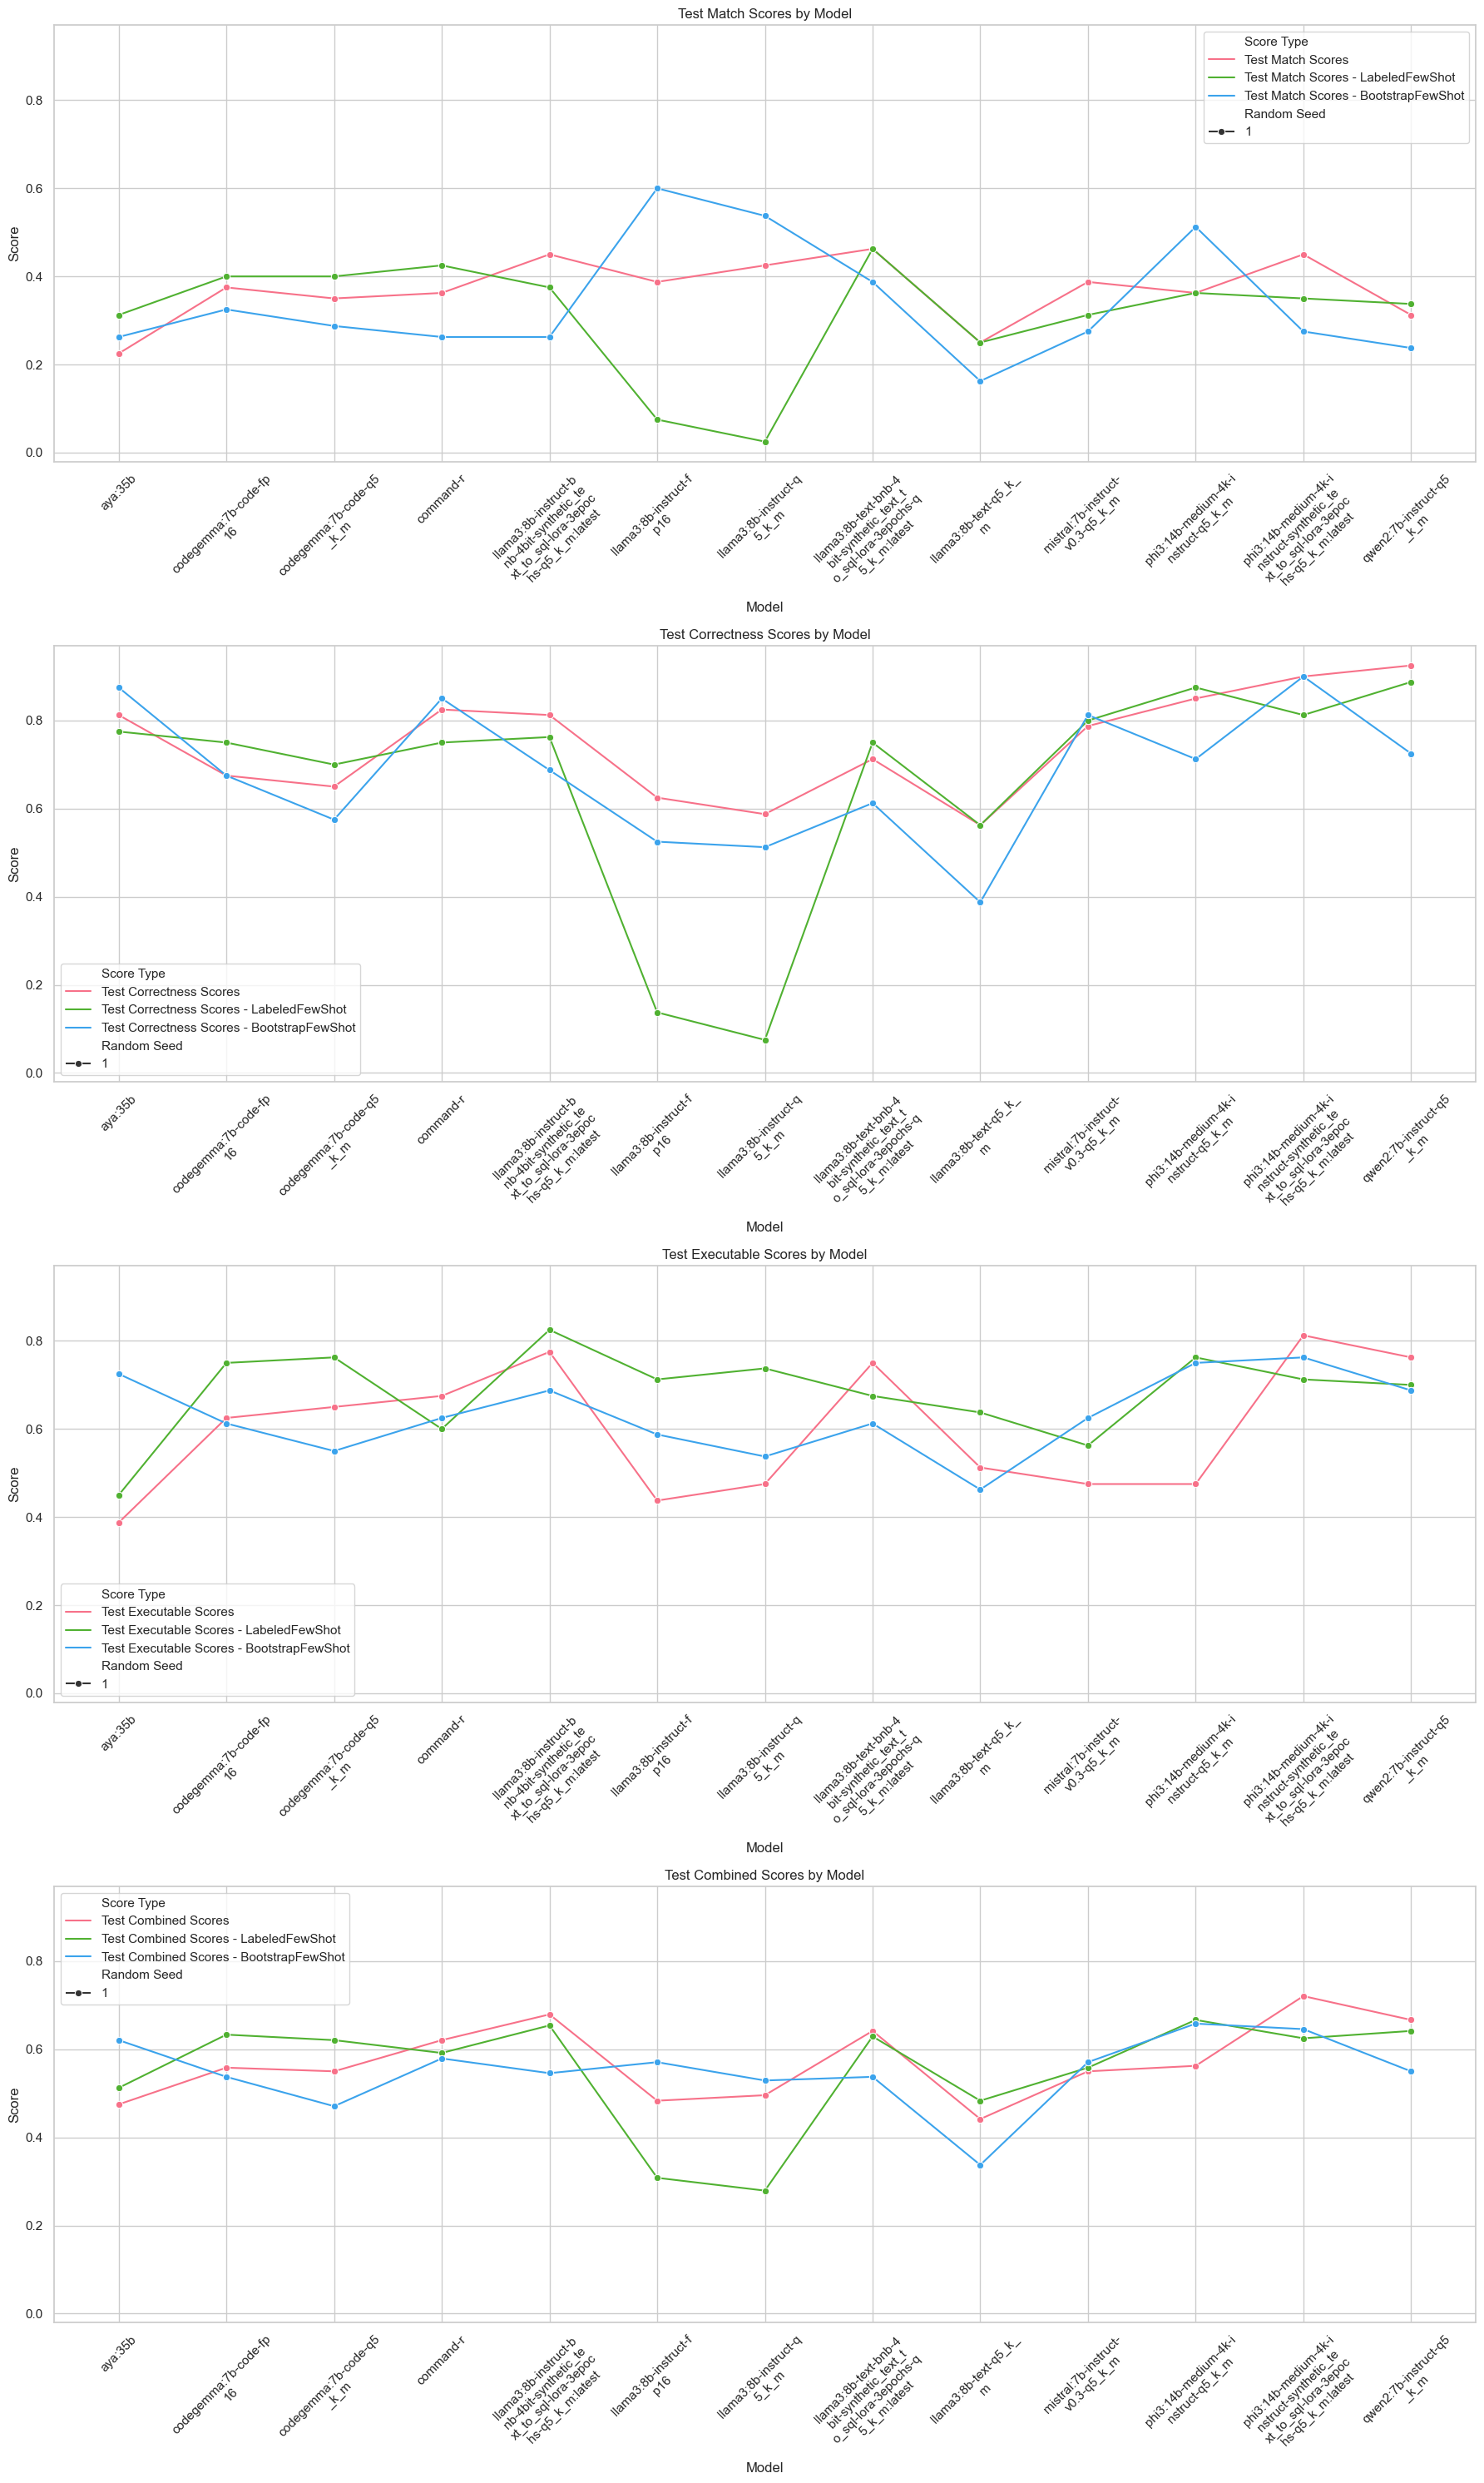

In [335]:
# Set seaborn style for the plots
sns.set(style='whitegrid')

# Function to create line plots for different score types
def plot_scores(df, score_columns, title, ax):
    melted_df = df.melt(id_vars=['Model', 'Random Seed'], value_vars=score_columns, var_name='Score Type', value_name='Score')
    sns.lineplot(data=melted_df, x='Model', y='Score', hue='Score Type', style='Random Seed', markers=True, dashes=dashes_dict, palette=palette, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.tick_params(axis='x', rotation=45)

# Define a color palette
# palette = sns.color_palette("husl", len(df['Random Seed'].unique()))

# Define a dashes dictionary for the random seeds
unique_seeds = df['Random Seed'].unique()
dashes_dict = {seed: ((i+1)*2, 1*i) for i, seed in enumerate(unique_seeds)}

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(18, 30), sharey=True)


# Plot test match scores
plot_scores(df, ['Test Match Scores', 'Test Match Scores - LabeledFewShot', 'Test Match Scores - BootstrapFewShot'], 'Test Match Scores by Model', axs[0])

# Plot test correctness scores
plot_scores(df, ['Test Correctness Scores', 'Test Correctness Scores - LabeledFewShot', 'Test Correctness Scores - BootstrapFewShot'], 'Test Correctness Scores by Model', axs[1])


# Plot test executable scores
plot_scores(df, [
    'Test Executable Scores', 
    'Test Executable Scores - LabeledFewShot', 
    'Test Executable Scores - BootstrapFewShot'
], 'Test Executable Scores by Model', axs[2])

# Plot test combined scores
plot_scores(df, [
    'Test Combined Scores', 
    'Test Combined Scores - LabeledFewShot', 
    'Test Combined Scores - BootstrapFewShot'
], 'Test Combined Scores by Model', axs[3])

# Adjust layout
plt.tight_layout()
plt.show()